In [1]:
#Import Dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
import warnings
warnings.filterwarnings("ignore")

In [3]:
#import data
df = pd.read_csv('Task Catagories.csv.csv')
df

,Task Description,Category,Skill
0,Implement user authentication,backend,spring boot
1,Optimize server performance,backend,asp.net
2,Manage database operations,backend,django
3,Implement user authentication,backend,api
4,Build a microservice,backend,kotlin
...,...,...,...
20117,Train model for image recognition,ai/ml,pytorch
20118,Set up data pipeline for ML model training,ai/ml,apache spark
20119,Deploy model for real-time predictions,ai/ml,docker
20120,Implement sentiment analysis for feedback,ai/ml,nltk


In [4]:
# Basic Info
print("Dataset Info:")
df.info()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20122 entries, 0 to 20121
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Task Description  20122 non-null  object
 1   Category          20122 non-null  object
 2   Skill             20122 non-null  object
dtypes: object(3)
memory usage: 471.7+ KB


In [5]:
# Total number of tasks
total_tasks = len(df)

# Unique categories
unique_categories = df['Category'].nunique()

# Unique skills
unique_skills = df['Skill'].nunique()

# Frequency distribution of categories and skills
category_counts = df['Category'].value_counts()
skill_counts = df['Skill'].value_counts()

print("Total Tasks:", total_tasks)
print("Unique Categories:", unique_categories)
print("Unique Skills:", unique_skills)
print("Category Counts:\n", category_counts)
print("Skill Counts:\n", skill_counts)

Total Tasks: 20122
Unique Categories: 13
Unique Skills: 232
Category Counts:
 backend                    2582
devops                     2582
testing                    2577
project management         2576
frontend                   1510
cloud                      1505
database administration    1505
deployment                 1505
documentation              1505
data science               1072
ui/ux design               1071
ai/ml                       127
database                      5
Name: Category, dtype: int64
Skill Counts:
 aws                463
Python             453
azure              445
heroku             420
google cloud       404
                  ... 
TensorFlow Lite      1
U-Net                1
EfficientNet         1
MLflow               1
tensorflow           1
Name: Skill, Length: 232, dtype: int64


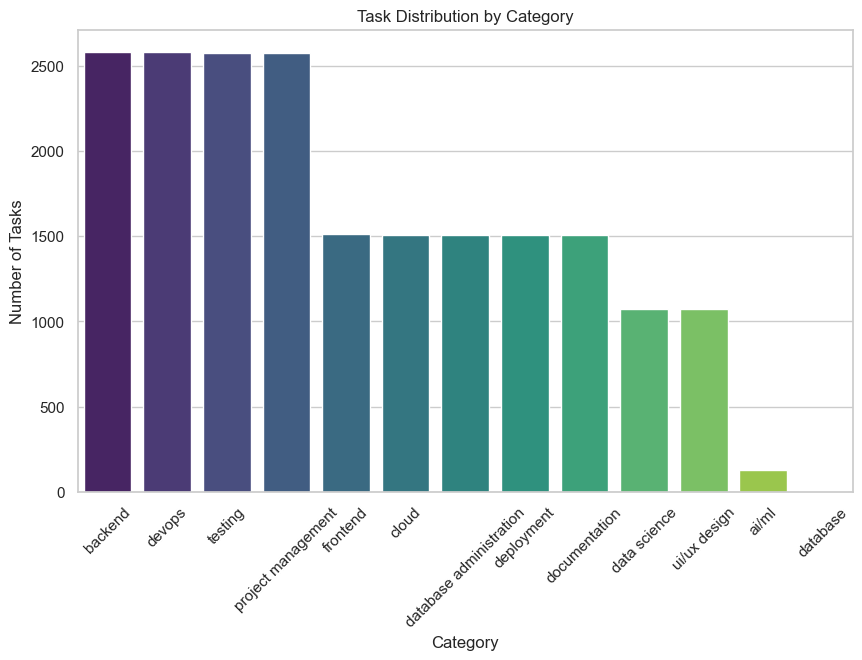

In [6]:
# Set style for plots
sns.set(style="whitegrid")

# Category distribution plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Category', order=df['Category'].value_counts().index, palette="viridis")
plt.title("Task Distribution by Category")
plt.xlabel("Category")
plt.ylabel("Number of Tasks")
plt.xticks(rotation=45)
plt.show()

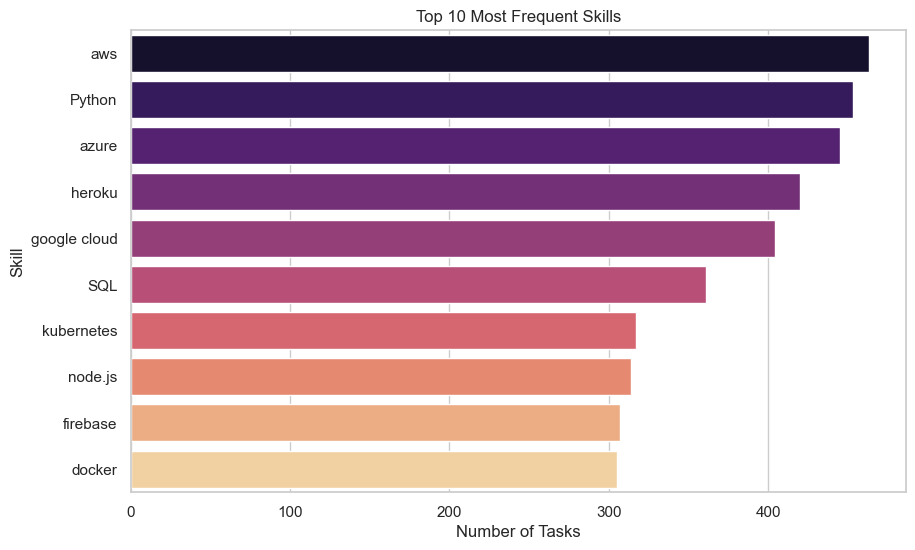

In [7]:
# Top 10 skills distribution
plt.figure(figsize=(10, 6))
top_skills = df['Skill'].value_counts().head(10)
sns.barplot(x=top_skills.values, y=top_skills.index, palette="magma")
plt.title("Top 10 Most Frequent Skills")
plt.xlabel("Number of Tasks")
plt.ylabel("Skill")
plt.show()

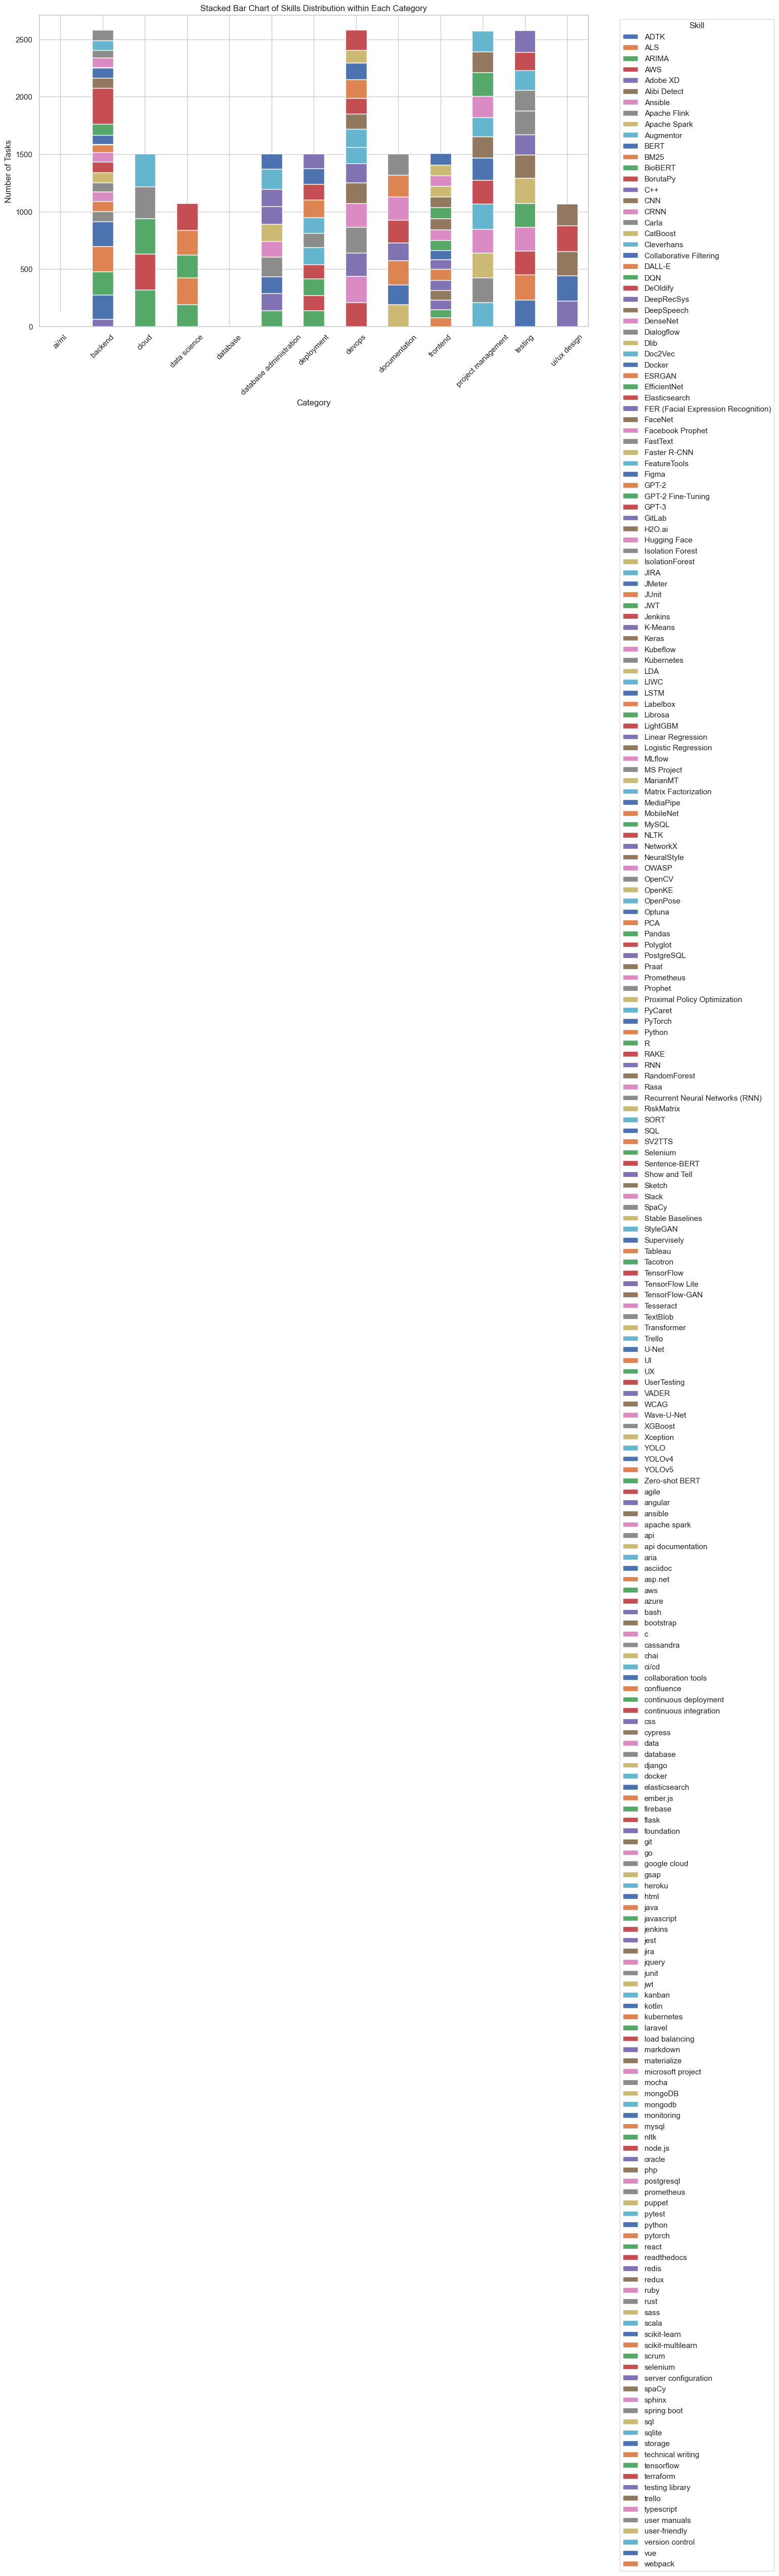

In [20]:
# Group by Category and Skill, then count occurrences
category_skill_counts = df.groupby(['Category', 'Skill']).size().unstack(fill_value=0)

# Plot Stacked Bar Chart
category_skill_counts.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title("Stacked Bar Chart of Skills Distribution within Each Category")
plt.xlabel("Category")
plt.ylabel("Number of Tasks")
plt.legend(title="Skill", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Vectorize the Skill column to convert it into numerical form
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['Skill'])

# Target variable
y = df['Category']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("Classification Report:\n", classification_report(y_test, y_pred))

In [21]:
#Using TF-IDF 2% improve the accuracy
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['Skill'])
y = df['Category']

# Address class imbalance with SMOTE, using a smaller k_neighbors
smote = SMOTE(random_state=42, k_neighbors=3)  # Reduced k_neighbors to 3
X_res, y_res = smote.fit_resample(X, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=42)

# Model
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred)*100)
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 91.06344950848973
Classification Report:
                          precision    recall  f1-score   support

                  ai/ml       1.00      0.96      0.98       522
                backend       1.00      0.62      0.77       498
                  cloud       0.69      1.00      0.82       504
           data science       0.81      1.00      0.90       515
               database       1.00      0.99      1.00       532
database administration       0.92      1.00      0.96       513
             deployment       0.70      0.53      0.60       516
                 devops       0.87      0.74      0.80       533
          documentation       1.00      1.00      1.00       527
               frontend       1.00      0.99      1.00       502
     project management       1.00      1.00      1.00       530
                testing       0.93      1.00      0.97       495
           ui/ux design       1.00      1.00      1.00       527

               accuracy             